# Proyecto: Modelo de aprendizaje automático para clasificar reclamos y opiniones en TikTok 
## Notebook 2: Aplicación de un modelo de aprendizaje automático supervisado

## Objetivo de la notebook:

### Ajustar un modelo que permita determinar a partir del dataset de Tik Tok si el tipo de declaración que contiene un video es un reclamo o una opinion.


### Importar y cargar las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm


## IMPORTACIÓN DE LOS DATOS
### Cargar dataset 


In [2]:
#Lectura del dataset sin datos faltantes
tik_tok2= pd.read_csv('../Data/tik_tok2.csv',delimiter=';',encoding='utf8')
tik_tok2

,Unnamed: 0,ID,tipo_declaracion,ID_video,duracion_video_seg,transcripcion_video,estado_verificado,estado_bloqueo_autor,vistas_video,likes_video,compartido_video,descargas_video,comentarios_video
0,0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19079,19080,opinion,1492320297,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.0,423.0,81.0,8.0,2.0
19080,19080,19081,opinion,9841347807,23,in our opinion the queens in ant colonies live...,not verified,active,2973.0,820.0,70.0,3.0,0.0
19081,19081,19082,opinion,8024379946,50,in our opinion the moon is moving away from th...,not verified,active,734.0,102.0,7.0,2.0,1.0
19082,19082,19083,opinion,7425795014,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.0,655.0,123.0,11.0,4.0


In [3]:
#Creamos una variable que contiene la cantidad de caracteres a partir de la variable transcripcion_video para poder trabajarla como integer
tik_tok2['largo_de_texto'] = tik_tok2['transcripcion_video'].str.len()
#Verificamos creación de nueva variable
tik_tok2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19084 entries, 0 to 19083
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19084 non-null  int64  
 1   ID                    19084 non-null  int64  
 2   tipo_declaracion      19084 non-null  object 
 3   ID_video              19084 non-null  int64  
 4   duracion_video_seg    19084 non-null  int64  
 5   transcripcion_video   19084 non-null  object 
 6   estado_verificado     19084 non-null  object 
 7   estado_bloqueo_autor  19084 non-null  object 
 8   vistas_video          19084 non-null  float64
 9   likes_video           19084 non-null  float64
 10  compartido_video      19084 non-null  float64
 11  descargas_video       19084 non-null  float64
 12  comentarios_video     19084 non-null  float64
 13  largo_de_texto        19084 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 2.0+ MB


In [4]:
tik_tok2['largo_de_texto']

0         97
1        107
2        137
3        131
4        128
        ... 
19079     65
19080     66
19081     53
19082     80
19083     70
Name: largo_de_texto, Length: 19084, dtype: int64

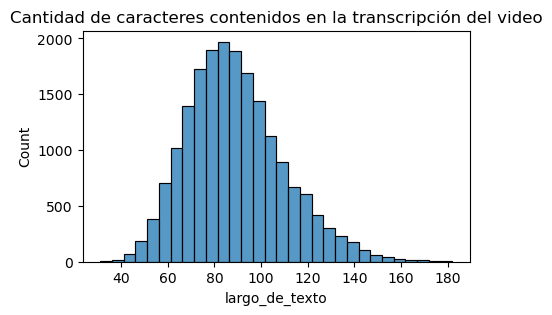

In [5]:
#Histograma con matplotlib
plt.figure(figsize=(5,3))
sns.histplot(tik_tok2['largo_de_texto'], bins=30)
plt.title('Cantidad de caracteres contenidos en la transcripción del video');

<div class="alert alert-block alert-success">
A partir de una variable de tipo objeto (transcripcion_video) se extrajo la cantidad de caracteres del texto y se creó una nueva variable de tipo integer, la cual presenta una distribución normal.</div>

<Axes: xlabel='tipo_declaracion', ylabel='largo_de_texto'>

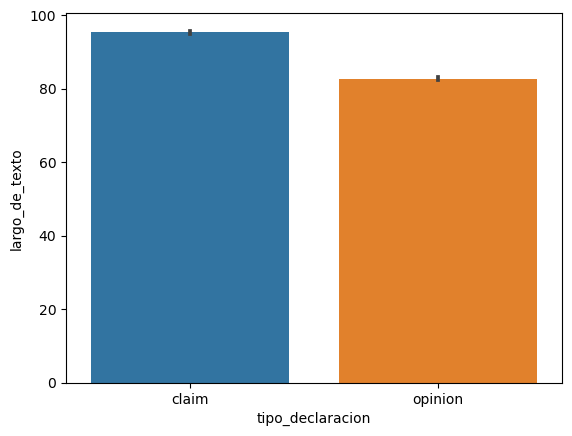

In [6]:
sns.barplot(data=tik_tok2, x='tipo_declaracion', y='largo_de_texto')

<div class="alert alert-block alert-success">
La variable 'largo_de_texto' no sería tan útil para diferenciar clases de declaración (claim y opinion) como el resto de las variables numéricas .</div>

In [7]:
#Verificamos nuevamente la presencia de valores nulos
tik_tok2.isnull().sum()

Unnamed: 0              0
ID                      0
tipo_declaracion        0
ID_video                0
duracion_video_seg      0
transcripcion_video     0
estado_verificado       0
estado_bloqueo_autor    0
vistas_video            0
likes_video             0
compartido_video        0
descargas_video         0
comentarios_video       0
largo_de_texto          0
dtype: int64

<div class="alert alert-block alert-success">
Este dataset no contiene datos faltantes.</div>

### Variable a predecir 


Nuestro objetivo es saber si un video contiene un reclamo o una opinión.

Para ello, vamos a utilizar la variable tipo_declaracion, que se divide en dos categorías: reclamo u opinión. Este es un problema de clasificación en aprendizaje automático. La variable tipo_declaracion es la variable a predecir.

### Balance de clases

In [8]:
#Distribución del tipo de declaración que contiene cada video
declarac = tik_tok2.groupby('tipo_declaracion', axis=0)
pd.DataFrame(declarac.size(), columns=['cantidad de registros'])

,cantidad de registros
tipo_declaracion,
claim,9608
opinion,9476


In [9]:
#Proporción de las categorías de la variable tipo_declaracion
pd.options.display.float_format = '{:.3f}'.format
print(tik_tok2['tipo_declaracion'].value_counts(normalize=True))

claim     0.503
opinion   0.497
Name: tipo_declaracion, dtype: float64


<div class="alert alert-block alert-success">
La proporción de reclamos es casi igual que la proporción de opiniones (50,3% y 49,7%, respectivamente), por lo que no hay un desbalance de clases. </div>

## PRE PROCESAMIENTO
En esta etapa se aplican técnicas de transformación de datos para mejorar el poder predictivo del modelo que se pretenda usar.


Consultamos los niveles de cada una de las variables categóricas


In [10]:
tik_tok2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19084 entries, 0 to 19083
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19084 non-null  int64  
 1   ID                    19084 non-null  int64  
 2   tipo_declaracion      19084 non-null  object 
 3   ID_video              19084 non-null  int64  
 4   duracion_video_seg    19084 non-null  int64  
 5   transcripcion_video   19084 non-null  object 
 6   estado_verificado     19084 non-null  object 
 7   estado_bloqueo_autor  19084 non-null  object 
 8   vistas_video          19084 non-null  float64
 9   likes_video           19084 non-null  float64
 10  compartido_video      19084 non-null  float64
 11  descargas_video       19084 non-null  float64
 12  comentarios_video     19084 non-null  float64
 13  largo_de_texto        19084 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 2.0+ MB


In [11]:
print(tik_tok2['tipo_declaracion'].unique())
print(tik_tok2['estado_verificado'].unique())
print(tik_tok2['estado_bloqueo_autor'].unique())

['claim' 'opinion']
['not verified' 'verified']
['under review' 'active' 'banned']


### Encodeamos las variables categóricas

In [12]:
#Generamos un nuevo dataframe para probar que todo funcione y no pisar el anterior
tik_tok3=tik_tok2 

In [13]:
tipo_declaracion_mapper = {
   'claim': 1,
    'opinion': 0}
tipo_declaracion_mapper

{'claim': 1, 'opinion': 0}

In [14]:
tik_tok3['tipo_declaracion'] = tik_tok2['tipo_declaracion'].map(tipo_declaracion_mapper)
tik_tok3['tipo_declaracion']

0        1
1        1
2        1
3        1
4        1
        ..
19079    0
19080    0
19081    0
19082    0
19083    0
Name: tipo_declaracion, Length: 19084, dtype: int64

<div class="alert alert-block alert-success">
Después de codificar las etiquetas de clase de la variable a predecir, los reclamos ahora se representan como clase 1 y las opiniones se representan como clase 0. </div>


In [15]:
verificado_mapper = {
   'not verified': 0,
    'verified': 1}
verificado_mapper

{'not verified': 0, 'verified': 1}

In [16]:
tik_tok3['estado_verificado'] = tik_tok2['estado_verificado'].map(verificado_mapper)
tik_tok3['estado_verificado']

0        0
1        0
2        0
3        0
4        0
        ..
19079    0
19080    0
19081    0
19082    0
19083    0
Name: estado_verificado, Length: 19084, dtype: int64

In [17]:
bloqueo_mapper = {
   'active': 1,
    'under review': 2,
    'banned': 3}
bloqueo_mapper

{'active': 1, 'under review': 2, 'banned': 3}

In [18]:
tik_tok3['estado_bloqueo_autor'] = tik_tok2['estado_bloqueo_autor'].map(bloqueo_mapper)
tik_tok3['estado_bloqueo_autor']

0        2
1        1
2        1
3        1
4        1
        ..
19079    1
19080    1
19081    1
19082    1
19083    1
Name: estado_bloqueo_autor, Length: 19084, dtype: int64

In [19]:
tik_tok3['largo_de_texto']=tik_tok2['largo_de_texto'].apply(lambda x: 0 if x < 60  else 1)
tik_tok3['largo_de_texto']

0        1
1        1
2        1
3        1
4        1
        ..
19079    1
19080    1
19081    0
19082    1
19083    1
Name: largo_de_texto, Length: 19084, dtype: int64

In [20]:
tik_tok3.head()

,Unnamed: 0,ID,tipo_declaracion,ID_video,duracion_video_seg,transcripcion_video,estado_verificado,estado_bloqueo_autor,vistas_video,likes_video,compartido_video,descargas_video,comentarios_video,largo_de_texto
0,0,1,1,7017666017,59,someone shared with me that drone deliveries a...,0,2,343296.000,19425.000,241.000,1.000,0.000,1
1,1,2,1,4014381136,32,someone shared with me that there are more mic...,0,1,140877.000,77355.000,19034.000,1161.000,684.000,1
2,2,3,1,9859838091,31,someone shared with me that american industria...,0,1,902185.000,97690.000,2858.000,833.000,329.000,1
3,3,4,1,1866847991,25,someone shared with me that the metro of st. p...,0,1,437506.000,239954.000,34812.000,1234.000,584.000,1
4,4,5,1,7105231098,19,someone shared with me that the number of busi...,0,1,56167.000,34987.000,4110.000,547.000,152.000,1


In [21]:
#Guardamos dataset trabajado como punto de partida para el resto de los análisis
tik_tok3.to_csv('tik_tok3.csv', encoding='utf-8')

In [22]:
tik_tok3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19084 entries, 0 to 19083
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19084 non-null  int64  
 1   ID                    19084 non-null  int64  
 2   tipo_declaracion      19084 non-null  int64  
 3   ID_video              19084 non-null  int64  
 4   duracion_video_seg    19084 non-null  int64  
 5   transcripcion_video   19084 non-null  object 
 6   estado_verificado     19084 non-null  int64  
 7   estado_bloqueo_autor  19084 non-null  int64  
 8   vistas_video          19084 non-null  float64
 9   likes_video           19084 non-null  float64
 10  compartido_video      19084 non-null  float64
 11  descargas_video       19084 non-null  float64
 12  comentarios_video     19084 non-null  float64
 13  largo_de_texto        19084 non-null  int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 2.0+ MB


In [23]:
#Eliminamos columnas que no aportan información
tik_tok3_mod = tik_tok3.drop(['Unnamed: 0', 'ID', 'ID_video', 'duracion_video_seg', 'transcripcion_video'], axis=1)

In [24]:
tik_tok3_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19084 entries, 0 to 19083
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tipo_declaracion      19084 non-null  int64  
 1   estado_verificado     19084 non-null  int64  
 2   estado_bloqueo_autor  19084 non-null  int64  
 3   vistas_video          19084 non-null  float64
 4   likes_video           19084 non-null  float64
 5   compartido_video      19084 non-null  float64
 6   descargas_video       19084 non-null  float64
 7   comentarios_video     19084 non-null  float64
 8   largo_de_texto        19084 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 1.3 MB


In [25]:
#Calculamos la matriz de correlación para las variables numéricas
corr = tik_tok3_mod.corr()

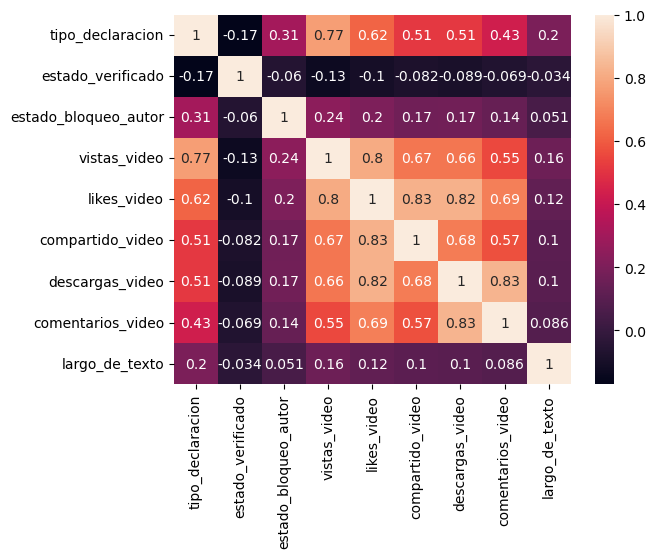

In [26]:
#Representación visual de la matriz de correlación
sns.heatmap(corr, annot=True)
plt.show()

<div class="alert alert-block alert-success">
La variables que parecerían tener mayor relación con el tipo de declaración son la cantidad de vistas y la cantidad de likes del video. </div>

### Seleccion de target (y) y variables (X)

Como variable a predecir (y) vamos a usar 'tipo_declaracion'. Debemos asegurarnos de no incluir la variables a predecir entre las features o variables independientes. 

In [27]:
xc = tik_tok3_mod.drop(['tipo_declaracion'], axis=1)
xc

,estado_verificado,estado_bloqueo_autor,vistas_video,likes_video,compartido_video,descargas_video,comentarios_video,largo_de_texto
0,0,2,343296.000,19425.000,241.000,1.000,0.000,1
1,0,1,140877.000,77355.000,19034.000,1161.000,684.000,1
2,0,1,902185.000,97690.000,2858.000,833.000,329.000,1
3,0,1,437506.000,239954.000,34812.000,1234.000,584.000,1
4,0,1,56167.000,34987.000,4110.000,547.000,152.000,1
...,...,...,...,...,...,...,...,...
19079,0,1,6067.000,423.000,81.000,8.000,2.000,1
19080,0,1,2973.000,820.000,70.000,3.000,0.000,1
19081,0,1,734.000,102.000,7.000,2.000,1.000,0
19082,0,1,3394.000,655.000,123.000,11.000,4.000,1


In [28]:
yc = tik_tok3_mod['tipo_declaracion']
yc

0        1
1        1
2        1
3        1
4        1
        ..
19079    0
19080    0
19081    0
19082    0
19083    0
Name: tipo_declaracion, Length: 19084, dtype: int64

## MODELADO
APRENDIZAJE SUPERVISADO - MODELO DE CLASIFICACIÓN

### Preparamos los datos para modelar
#### Separamos train/test

In [29]:
#Importamos la librería para separar el dataset
from sklearn.model_selection import train_test_split

In [30]:
#Dividimos el dataset en un conjunto de entrenamiento y un conjunto de prueba (80% entrenamiento, 20% prueba)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(xc, yc, test_size=0.2,
                                                    random_state=42)


In [31]:
#Verificamos el tamaño de cada conjunto
X_train_c.shape, y_train_c.shape, X_test_c.shape, y_test_c.shape

((15267, 8), (15267,), (3817, 8), (3817,))

### Modelo predictivo utilizando Random Forest (RF) modificando hiperparámetros

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier(random_state = 42)

In [34]:
# Creamos un diccionario de hyperparametros
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

In [35]:
# Definimos un diccionario de metricas de scoring
scoring = {'accuracy', 'precision', 'recall', 'f1'}

Los parámetros del estimador se optimizan mediante una búsqueda con validación cruzada sobre una cuadrícula de parámetros.

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Instanciamos el objeto GridSearchCV
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')
rf_cv

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'recall', 'precision', 'accuracy', 'f1'})

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
%%time
rf_cv.fit(X_train_c, y_train_c)

CPU times: total: 4min 31s
Wall time: 4min 39s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'recall', 'precision', 'accuracy', 'f1'})

In [40]:
rf_cv.best_score_

0.9908854166666666

In [48]:
# Examinar los mejores parámeteros
rf_cv.best_params_

{'max_depth': 7,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

##  EVALUAR EL MODELO

La matriz de confusión ayuda a visualizar el desempeño del algoritmo.

### Evaluación del modelo predictivo utilizando Random Forest (RF) modificando hiperparámetros

**Métricas** 

Matriz de confusión:

True Negative (TN)  |  False positive (FP)   
= = = = = = = = = = = = = = = = = = = = =       
False negative (FN) | True positive (TP) 

In [49]:
y_pred = rf_cv.best_estimator_.predict(X_test_c)

Realizamos una matriz de confusion para visualizar los resultados del modelo de clasificación.

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

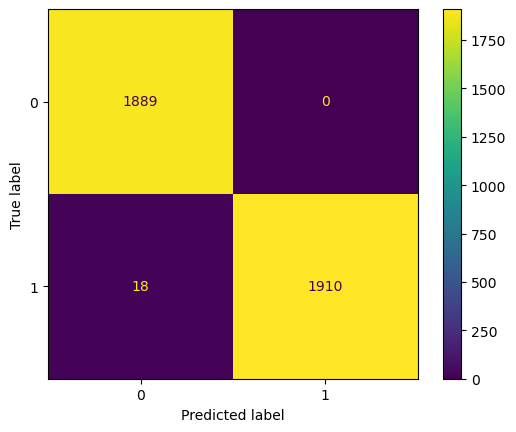

In [53]:
log_cm = confusion_matrix(y_test_c, y_pred)
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = None)
log_disp.plot()

<div class="alert alert-block alert-success">
Se predijeron las clases reclamo =1 y la clase opinión= 0.
    
El modelo realizó 3.817 predicciones, de las cuales 1.910 casos fueron clasificados como reclamo y 1.907 casos como opinión. 
Si lo constrastamos con los valores reales, la muestra presenta 1.899 clasificados como reclamos y 1.928 casos clasificados como opinión.   
    
</div>

<div class="alert alert-block alert-success">
<b>Este modelo funciona muy bien, con un puntaje de precisión promedio de 0,991. Después de verificar el puntaje de precisión para asegurarse de que el modelo no esté clasificando todas las muestras como reclamos, está claro que el resultado es el correcto.
    
El modelo es muy bueno para identificar reclamos, incluso cuando hay muchas otras clases de datos presentes. Esto podria ser muy útil para aplicaciones en las que es importante identificarlos de manera rápida y precisa, como en el monitoreo de redes sociales o la detección de noticias falsas.</div>

